In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [6]:
data = pd.read_excel('../Data/B5/Iris.xls')
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.groupby('iris').mean().loc['Iris-versicolor','petallength']

4.26

In [21]:
data_versi_pental_len = data[data['iris']=='Iris-versicolor']['petallength']
percentiles_lst = np.array([2.5, 25, 50, 75, 97.5])
percentiles_result = np.percentile(data_versi_pental_len, percentiles_lst)
percentiles_result

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

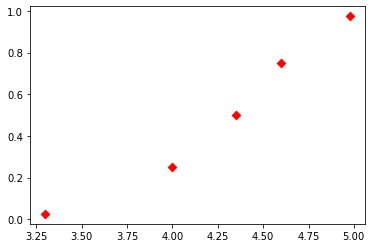

In [31]:
plt.scatter(x=percentiles_result, y=percentiles_lst/100, marker='D', color='red');

In [35]:
differcences = data['petallength'] - data['petallength'].mean()
differcences_squared = differcences**2
variance_explicit = 1/(differcences.shape[0]-1)*differcences_squared.sum()
variance_explicit

3.113179418344519

In [36]:
data['petallength'].var()

3.113179418344519

In [38]:
np.var(data['petallength'], ddof=1)

3.113179418344519

In [39]:
std_explicit = np.sqrt(variance_explicit)
std_explicit

1.7644204199522626

In [40]:
data['petallength'].std()

1.7644204199522626

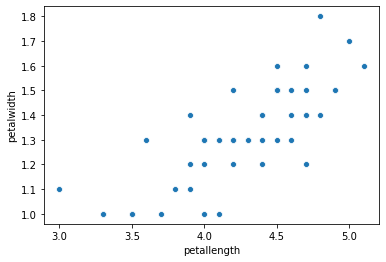

In [43]:
data_versi = data[data['iris']=='Iris-versicolor']
sb.scatterplot(x=data_versi['petallength'], y=data_versi['petalwidth']);

In [45]:
cov_versi = data_versi.cov()
cov_versi

,sepallength,sepalwidth,petallength,petalwidth
sepallength,0.266433,0.085184,0.182898,0.055780
sepalwidth,0.085184,0.098469,0.082653,0.041204
petallength,0.182898,0.082653,0.220816,0.073102
petalwidth,0.055780,0.041204,0.073102,0.039106


In [46]:
cov_versi.loc['petallength','petalwidth']

0.07310204081632651

In [47]:
corr_versi = data_versi.corr()
corr_versi

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,0.525911,0.754049,0.546461
sepalwidth,0.525911,1.000000,0.560522,0.663999
petallength,0.754049,0.560522,1.000000,0.786668
petalwidth,0.546461,0.663999,0.786668,1.000000


In [48]:
corr_versi.loc['petallength','petalwidth']

0.7866680885228168

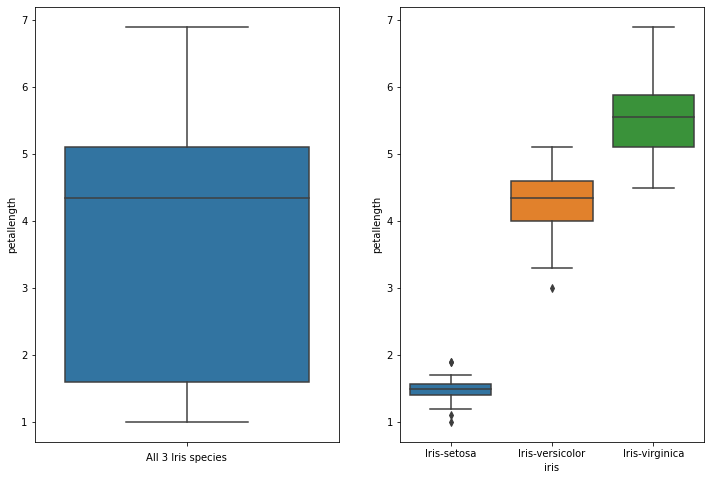

In [58]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sb.boxplot(data= data, y='petallength')
plt.xlabel('All 3 Iris species')
plt.subplot(1,2,2)
sb.boxplot(data= data, y='petallength', x='iris')
plt.show()

In [62]:
# Nhận xét:
# - Iris-setosa và Iris-versicolor có Outliers
# - Iris-virginica không có Outlier

In [69]:
data_seto = data[data['iris']=='Iris-setosa']
z_versi = stats.zscore(data_versi['petallength'])
z_seto = stats.zscore(data_seto['petallength'])

In [77]:
for i in np.where((z_versi>2.5) | (z_versi<-2.5))[0]:
    print('Iris-versicolor: \t Index of Outlier: %i, Outlier Value: %.2f' %(i, data_versi.iloc[i]['petallength']) )

Iris-versicolor: 	 Index of Outlier: 48, Outlier Value: 3.00


In [80]:
for i in np.where((z_seto>2.5) | (z_seto<-2.5))[0]:
    print('Iris-versicolor: \t Index of Outlier: %i, Outlier Value: %.2f' %(i, data_seto.iloc[i]['petallength']) )

Iris-versicolor: 	 Index of Outlier: 22, Outlier Value: 1.00
Iris-versicolor: 	 Index of Outlier: 24, Outlier Value: 1.90
Iris-versicolor: 	 Index of Outlier: 44, Outlier Value: 1.90
